# <font color=blue>Assignments for "Simple Linear Regression"</font>

Now, it's your turn to design your first regression model. In this module, you'll be using a version of the ["House Prices" dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**(1)** Investigate the data and do any necessary data cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

house = pd.read_csv(r"C:\Users\Kleerys\Desktop\Assignments for Regression_Problems\.ipynb_checkpoints\train.csv")
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2]:
display(house)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
for col in house.columns:
    if house[col].isnull().sum() != 0:
        print("*****")
        print("{} feature has {} null values.".format(col, house[col].isnull().sum()))
print("The features that has no null-values are not displayed.")

*****
LotFrontage feature has 259 null values.
*****
Alley feature has 1369 null values.
*****
MasVnrType feature has 8 null values.
*****
MasVnrArea feature has 8 null values.
*****
BsmtQual feature has 37 null values.
*****
BsmtCond feature has 37 null values.
*****
BsmtExposure feature has 38 null values.
*****
BsmtFinType1 feature has 37 null values.
*****
BsmtFinType2 feature has 38 null values.
*****
Electrical feature has 1 null values.
*****
FireplaceQu feature has 690 null values.
*****
GarageType feature has 81 null values.
*****
GarageYrBlt feature has 81 null values.
*****
GarageFinish feature has 81 null values.
*****
GarageQual feature has 81 null values.
*****
GarageCond feature has 81 null values.
*****
PoolQC feature has 1453 null values.
*****
Fence feature has 1179 null values.
*****
MiscFeature feature has 1406 null values.
The features that has no null-values are not displayed.


***Some features have much more null-values than the others have. To understand why, we should check these features by looking what they contain.***

In [4]:
a = pd.DataFrame()
for col in house.columns:
    if (house[col].isnull().sum() >= 100):
        a = pd.concat([a, house[col]], axis = 1, names = [col])
display(a)
print(a.info())

,LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
0,65.0,NaN,NaN,NaN,NaN,NaN
1,80.0,NaN,TA,NaN,NaN,NaN
2,68.0,NaN,TA,NaN,NaN,NaN
3,60.0,NaN,Gd,NaN,NaN,NaN
4,84.0,NaN,TA,NaN,NaN,NaN
...,...,...,...,...,...,...
1455,62.0,NaN,TA,NaN,NaN,NaN
1456,85.0,NaN,TA,NaN,MnPrv,NaN
1457,66.0,NaN,Gd,NaN,GdPrv,Shed
1458,68.0,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   Alley        91 non-null     object 
 2   FireplaceQu  770 non-null    object 
 3   PoolQC       7 non-null      object 
 4   Fence        281 non-null    object 
 5   MiscFeature  54 non-null     object 
dtypes: float64(1), object(5)
memory usage: 79.8+ KB
None


***Except the LotFrontage all variables have object type. Find a solution to fill these values.***

In [5]:
for col in a.columns:
    print(a[col].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
[nan 'Grvl' 'Pave']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
[nan 'Ex' 'Fa' 'Gd']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [6]:
for col in house.columns:
    if col not in a.columns:
        house.drop(house[house[col].isnull()].index, inplace = True)
        house.reset_index(drop = True, inplace = True)
        a.drop(house[house[col].isnull()].index, inplace = True)
        a.reset_index(drop = True, inplace = True)

In [7]:
for col in house.columns:
    if house[col].isnull().sum() != 0:
        print("*****")
        print("{} feature has {} null values.".format(col, house[col].isnull().sum()))
print("*-*-*-*-*-*")
print("The features that has no null-values are not displayed.")

*****
LotFrontage feature has 244 null values.
*****
Alley feature has 1257 null values.
*****
FireplaceQu feature has 591 null values.
*****
PoolQC feature has 1331 null values.
*****
Fence feature has 1077 null values.
*****
MiscFeature feature has 1289 null values.
*-*-*-*-*-*
The features that has no null-values are not displayed.


In [8]:
print("Filling Lot Frontage By Feature's Mean")
mean = np.mean(house.LotFrontage.dropna())
for index in house.index:
    if np.isnan(house.LotFrontage.iloc[index]):
        house.LotFrontage.iloc[index] = mean
print("Done! Check!")
print("{} column has {} null values.".format("LotFrontage", house.LotFrontage.isnull().sum()))

Filling Lot Frontage By Feature's Mean
Done! Check!
LotFrontage column has 0 null values.


***This was the easiest part. Now we have to fill null values in the features that contain object type variables. It makes sense turning these values into dummies by using pd.get_dummies. It provides better variables to use in functions to see how distributes the values.***

***pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)[source]
Convert categorical variable into dummy/indicator variables.***

***Parameters
dataarray-like, Series, or DataFrame
Data of which to get dummy indicators.***

***prefixstr, list of str, or dict of str, default None
String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Alternatively, prefix can be a dictionary mapping column names to prefixes.***

***prefix_sepstr, default ‘_’
If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.***

***dummy_nabool, default False
Add a column to indicate NaNs, if False NaNs are ignored.***

***columnslist-like, default None
Column names in the DataFrame to be encoded. If columns is None then all the columns with object or category dtype will be converted.***

***sparsebool, default False
Whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False).***

***drop_firstbool, default False
Whether to get k-1 dummies out of k categorical levels by removing the first level.***

***dtypedtype, default np.uint8
Data type for new columns. Only a single dtype is allowed.***

***New in version 0.23.0.***

***Returns
DataFrame
Dummy-coded data.***

In [9]:
import scipy.stats as scis

In [10]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
def drop (target):
    z = scis.zscore(house["SalePrice"])
    limit = 4 * np.std(house["SalePrice"]) + np.mean(house["SalePrice"])
    house.drop(house[house["SalePrice"] >= limit].index, axis = 0, inplace = True)
    house.reset_index(drop = True, inplace = True)
    return house

In [12]:
z = scis.zscore(house["SalePrice"])
while (len(np.where(z > 4)[0]) != 0):
    z = scis.zscore(house["SalePrice"])
    house = drop(house["SalePrice"])
    print("*****")
    print("Threshold value: {}".format(4))
    print("Numbers of outliers: {}".format(len(np.where(z > 4)[0])))

*****
Threshold value: 4
Numbers of outliers: 8
*****
Threshold value: 4
Numbers of outliers: 3
*****
Threshold value: 4
Numbers of outliers: 1
*****
Threshold value: 4
Numbers of outliers: 0


***z = (x - mean) / std***

**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.


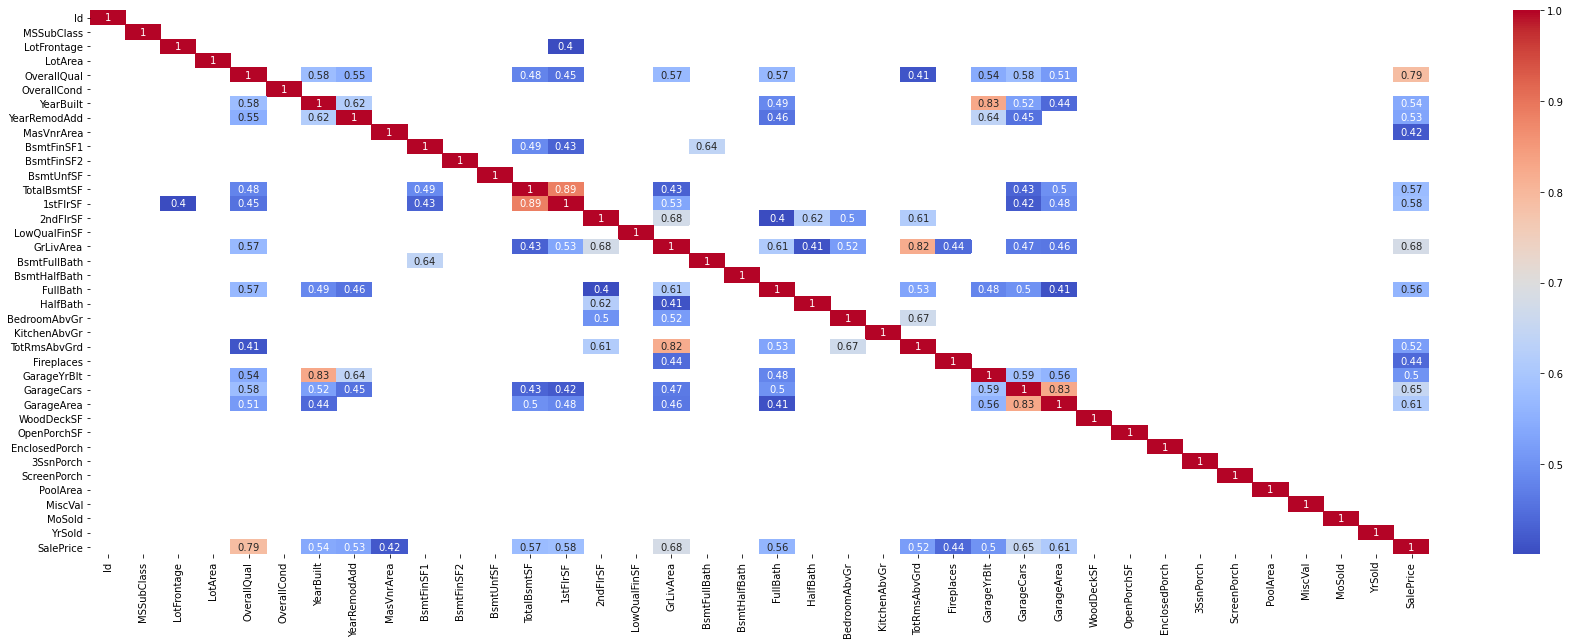

In [13]:
import seaborn as sns

plt.figure(figsize = (30,10))
mask = house.corr() < 0.4
sns.heatmap(house.corr(), annot = True, cmap = "coolwarm", fmt=".2g", mask = mask)
plt.show()

**(3)** Build your initial model using these features and estimate the parameters using OLS.

In [14]:
y = house["SalePrice"]
X = house.drop("SalePrice", axis = 1)

In [21]:
for col in X.columns:
    try:
        np.mean(X[col])
    except:
        X.drop(col, axis = 1, inplace = True)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [24]:
linear = LinearRegression()

In [25]:
linear.fit(X_train, y_train)

LinearRegression()

In [28]:
import statsmodels.api as sm

In [59]:
X_train = sm.add_constant(X_train)
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     122.6
Date:                Thu, 08 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:22:02   Log-Likelihood:                -12448.
No. Observations:                1060   AIC:                         2.497e+04
Df Residuals:                    1024   BIC:                         2.515e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.455e+05   1.49e+06     -0.098      0.922   -3.06e+06    2.77e+06
Id               -3.7868      2.296     -1.649      0.099      -8.292       0.718
MSSubClass     -173.1588     29.295     -5.911      0.000    -230.643    -115.675
LotFrontage    -128.3314     52.622     -2.439      0.015    -231.590     -25.073
LotArea           0.2609      0.127      2.055      0.040       0.012       0.510
OverallQual    1.816e+04   1258.770     14.425      0.000    1.57e+04    2.06e+04
OverallCond    5138.5410   1159.601      4.431      0.000    2863.074    7414.007
YearBuilt       457.1694     82.621      5.533      0.000     295.044     619.295
YearRemodAdd    245.7391     76.797      3.200      0.001      95.041     396.437
MasVnrArea       20.9063      6.528      3.202      0.001       8.096      33.717
BsmtFinSF1        6.1357      2.703      2.270      0.023       0.832      11.440
BsmtFinSF2       -0.7058      4.582     -0.154      0.878      -9.696       8.285
BsmtUnfSF        -1.7180      2.768     -0.621      0.535      -7.150       3.714
TotalBsmtSF       3.7118      4.698      0.790      0.430      -5.507      12.931
1stFlrSF         13.9502      7.818      1.784      0.075      -1.391      29.291
2ndFlrSF         15.5664      6.733      2.312      0.021       2.355      28.778
LowQualFinSF     -9.0862     18.465     -0.492      0.623     -45.319      27.147
GrLivArea        20.4304      7.007      2.916      0.004       6.681      34.179
BsmtFullBath    1.04e+04   2792.144      3.725      0.000    4922.938    1.59e+04
BsmtHalfBath   -849.9688   4315.681     -0.197      0.844   -9318.557    7618.620
FullBath         70.3054   3073.771      0.023      0.982   -5961.305    6101.916
HalfBath      -4576.9825   2873.270     -1.593      0.111   -1.02e+04    1061.186
BedroomAbvGr  -4695.2206   1874.651     -2.505      0.012   -8373.817   -1016.624
KitchenAbvGr  -1.841e+04   6755.820     -2.725      0.007   -3.17e+04   -5153.034
TotRmsAbvGrd   4598.3850   1352.801      3.399      0.001    1943.806    7252.964
Fireplaces     6939.1793   1898.156      3.656      0.000    3214.460    1.07e+04
GarageYrBlt    -201.4130     83.857     -2.402      0.016    -365.963     -36.863
GarageCars     1.649e+04   3069.934      5.373      0.000    1.05e+04    2.25e+04
GarageArea       15.5613     10.608      1.467      0.143      -5.255      36.377
WoodDeckSF       28.6244      8.322      3.440      0.001      12.294      44.955
OpenPorchSF      17.5321     15.993      1.096      0.273     -13.851      48.916
EnclosedPorch    23.7673     17.978      1.322      0.186     -11.511      59.046
3SsnPorch        56.3509     33.548      1.680      0.093      -9.480     122.182
ScreenPorch      42.1153     17.422      2.417      0.016       7.928      76.302
PoolArea        -78.6857     22.939     -3.430   

In [61]:
y_testPred = linear.predict(X_test)

In [62]:
y_test

179     171500
650     165000
220     241500
1033    139000
937     230000
         ...  
1113    367294
1117    142000
136     122000
785     131500
1110    145000
Name: SalePrice, Length: 266, dtype: int64

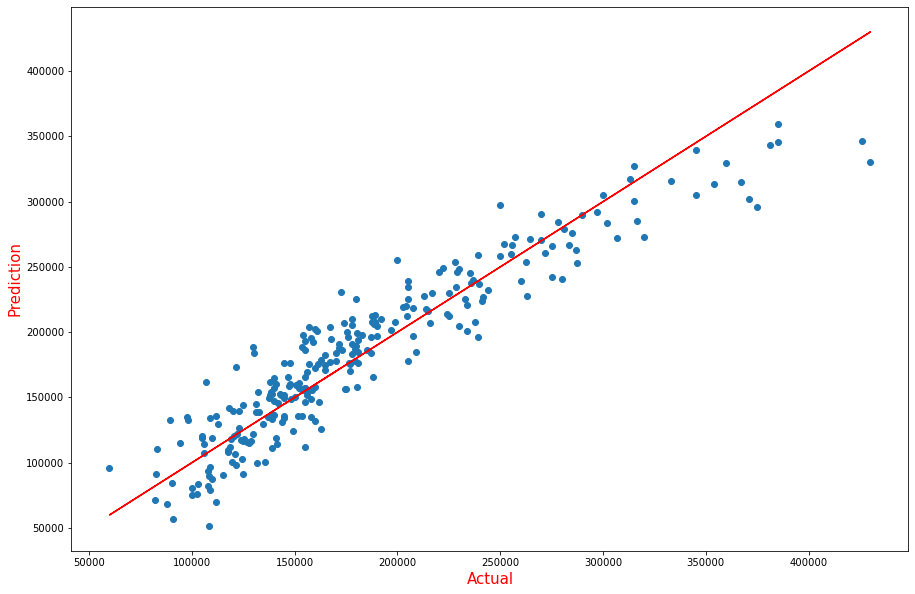

In [63]:
plt.figure(figsize = (15,10))
plt.scatter(x = y_test, y = y_testPred)
plt.plot(y_test, y_test, color = "red")
plt.xlabel("Actual", color = "red", size = (15))
plt.ylabel("Prediction", color = "red", size = (15))
plt.show()